#Stock market prediction and analysis on Yahoo Finance stock data using Monte Carlo method#


Data belongs to Carriage Services, NYSE from Yahoo finance. The data period is August 09, 2019 to May 19, 2019

##Question##
###Questions can be explored within the stock market: ###

What was the change in price of the stock over time?<br>
What was the daily return of the stock on average?<br>
What was the moving average of the  stocks?<br>
How much value do we put at risk by investing in a particular stock?<br>
How can we attempt to predict future stock behavior?<br>

In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division

In [0]:
#setting history of the data
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [3]:
data = pd.read_csv('Yahoo.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-08-09,14.250,16.750,14.250,16.500,15.264661,1601500
1,1996-08-12,16.500,16.750,16.375,16.500,15.264661,260900
2,1996-08-13,16.500,16.750,16.375,16.375,15.149018,162800
3,1996-08-14,16.375,16.625,16.375,16.375,15.149018,59500
4,1996-08-15,16.625,16.625,16.375,16.625,15.380298,62300


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5.731000e+03
mean,11.916156,12.083016,11.748112,11.918424,11.303269,6.380396e+04
std,8.475135,8.559105,8.392166,8.473980,8.191238,8.734757e+04
min,1.187500,1.312500,1.062500,1.187500,1.098593,0.000000e+00
25%,4.750000,4.820000,4.687500,4.750000,4.394372,1.870000e+04
50%,7.500000,7.600000,7.400000,7.500000,7.012492,4.060000e+04
75%,20.000000,20.245000,19.627499,20.000000,19.196472,7.970000e+04
max,29.000000,29.250000,28.840000,29.000000,28.074085,2.073400e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5731 entries, 0 to 5730
Data columns (total 7 columns):
Date         5731 non-null object
Open         5731 non-null float64
High         5731 non-null float64
Low          5731 non-null float64
Close        5731 non-null float64
Adj Close    5731 non-null float64
Volume       5731 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 313.5+ KB


In [6]:
#shows all missing values with counting the values in each column
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


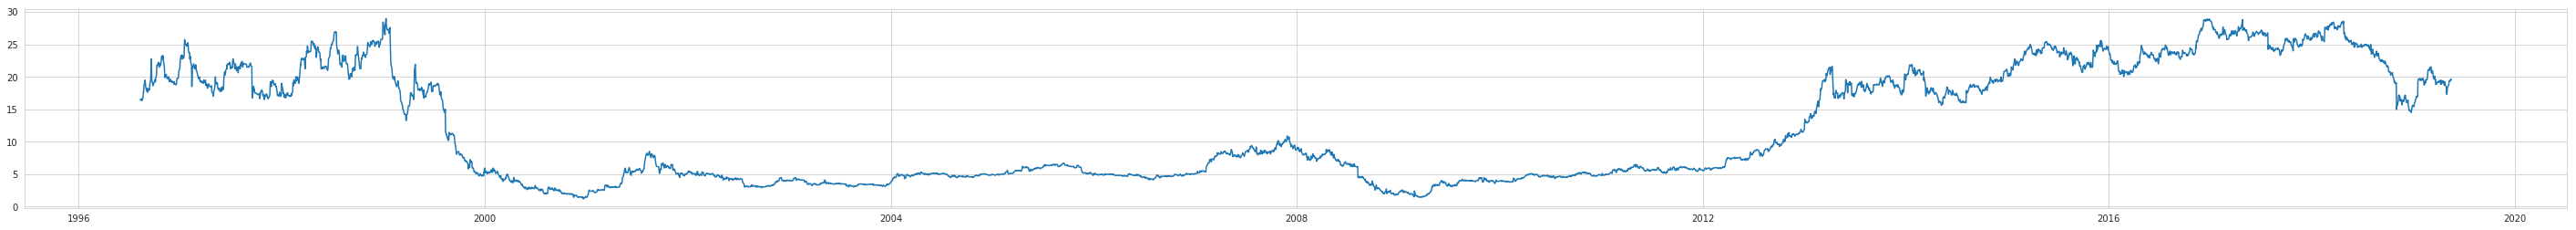

In [7]:
# Historical view of closing in the data

data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']


plt.figure(figsize=(50,4))
plt.plot(data['Close'], label='Close Price history')

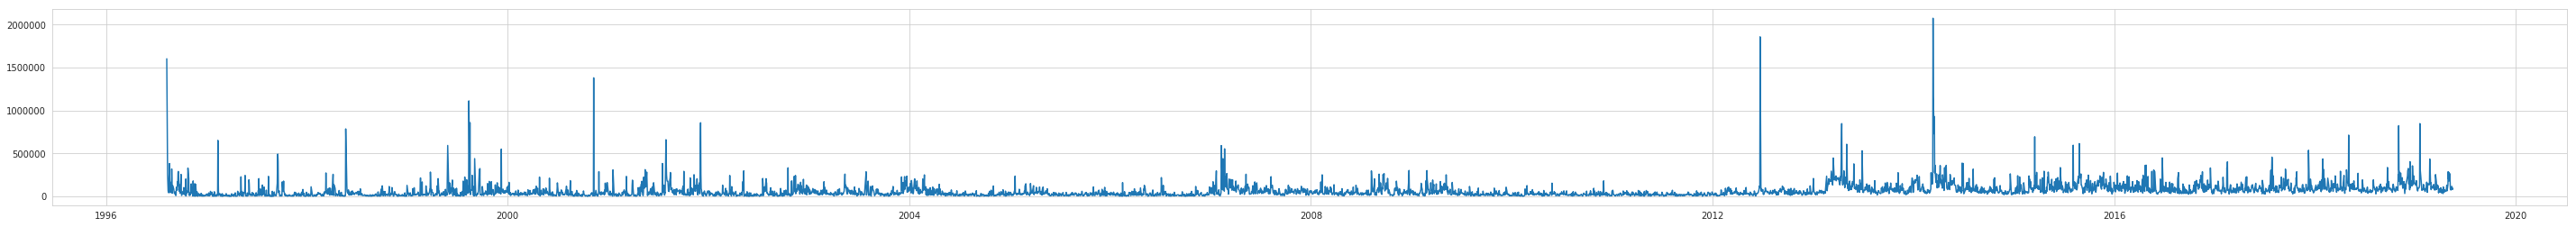

In [8]:
#total volume of stock being traded each day over the past year
plt.figure(figsize=(50,4))
plt.plot(data['Volume'], label='Total Volume traded')


In the above historical plot, we can see that Yahoo stock was highest traded in around 2014, i.e., year period of 2012 to 2016.

##Trend Trading: Using Moving Average##
the 4 most commonm indicators for stock market are:<br>
Moving average<br>
Moving Average Convergence Divergence<br>
Relative Strength Index<br>
On-Balance Volume <br>

You can find more information on this link : https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp <br>
<br>
<br>
We will use moving average strategy for this analysis. Check this link to find working of moving average: https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [0]:
MAvg_day = [50,100,200, 360, 800]
for ma in MAvg_day:
    column_name = 'MA for %s days' %(str(ma))
    data[column_name] = data['Close'].rolling(ma).mean()

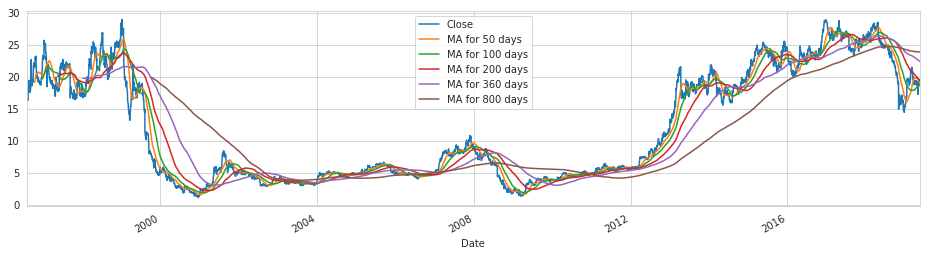

In [10]:
# all the additional Moving Averages for Yahoo stock
data[['Close','MA for 50 days','MA for 100 days','MA for 200 days','MA for 360 days','MA for 800 days']].plot(subplots=False,figsize=(16,4))

Definition 1: A moving average simplifies price data by smoothing it out and creating one flowing line<br>
<br>
Key1: Moving averages with a shorter look back period (50 days, for example) will also respond quicker to price changes than an average with a longer look back period (800 days). <br>
Key2: Exponential moving averages react quicker to price changes than simple moving averages. 

##Risk Analysis ##
Let's see how the stock is changing on daily basis i,e, daily return. Here, the percentage chainge on daily basis will be the tool for risk analysis.


In [11]:
data['Daily Return'] = data['Close'].pct_change()
data['Daily Return'].head()

Date
1996-08-09         NaN
1996-08-12    0.000000
1996-08-13   -0.007576
1996-08-14    0.000000
1996-08-15    0.015267
Name: Daily Return, dtype: float64

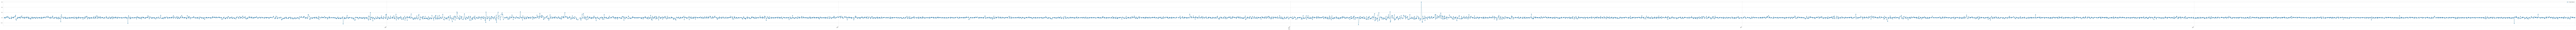

In [12]:
data['Daily Return'].plot(figsize=(552,6), legend=True, linestyle='--', marker='o')

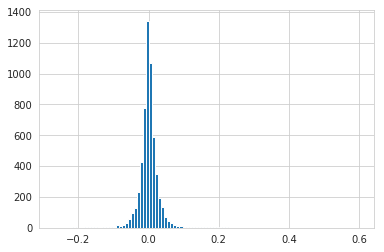

In [13]:
#plotting histogram for average daily return 
data['Daily Return'].hist(bins=100)

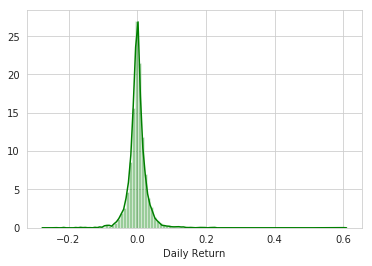

In [14]:
sns.distplot(data['Daily Return'].dropna(), bins=100, color='green')


###Analyzing risk###
Comparing the expected return with the standard deviation of the daily returns(Risk).

In [15]:
df = data['Daily Return'].dropna()
print("Percentage change Mean: ",df.mean())
print("Percentage change std: ",df.std())

Percentage change Mean:  0.0004473703063334746
Percentage change std:  0.02922723995404305


Text(0, 0.5, 'Risk')

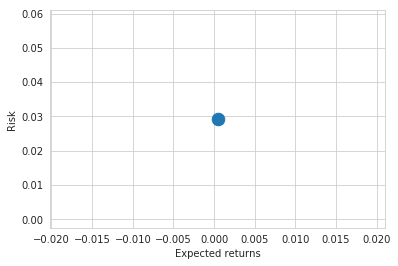

In [16]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*50
plt.scatter(df.mean(),df.std(),s=area)


#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

Okk, the above graph says that the risk is 0.03 and have a positive expected return. It's good, i.e, low risk.

###Value at risk###

Defining value at risk parameter for stocks. We can treat value at risk as the amount of money we could expect to lose by putting at risk for a given confidence interval<br>
Value at risk using the "bootstrap" method: calculate the empirical quantiles from a histogram of daily returns. 

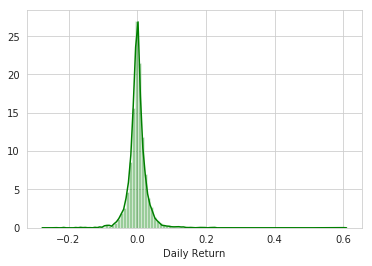

In [17]:
sns.distplot(data['Daily Return'].dropna(), bins=100, color='green')


In [18]:
# the empirical quantile of daily returns is 0.05
df.quantile(0.05)

-0.03941544434857634

0.05 quantile means, we can normally assume that they are asking for at least 95% of the probability to the right of the value chosen, and no more than 5% of the probability to the left of the value chosen.<br>
The 0.05 empirical quantile of daily returns is at -0.03941544434857634. That means that with 95% confidence, our worst daily loss will not exceed 3.9%. If we have a 1 million dollar investment, our one-day 5% Value at Risk is 0.039 * 1,000,000 = $39000.

##Value at risk using Monte Carlo simulation##
Monte Carlo simulation is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models. Also referred to as multiple probability simulation. Reference: https://www.investopedia.com/terms/m/montecarlosimulation.asp<br><br>
To calculate the value at risk (VaR) of a portfolio, we can run a Monte Carlo simulation that attempts to predict the worst likely loss for a portfolio given a confidence interval over a specified time horizon (we always need to specify two conditions for VaR: confidence and horizon). Reference:https://www.investopedia.com/articles/07/montecarlo.asp

###Methodology###
Here in the simulation, I will run many trials and calculate the loss for the portfolio.
The basics steps are as follows:<br>
1. Specify a Model (e.g. Geometric Brownian Motion, GBM)
2. Generate Random Trials
3. Process the Output
</br></br>
Step 1: So, we will choose the model of GBM, which is a markov process and states the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH) – past price information is already incorporated, and the next price movement is "conditionally independent" of past price movements. [You can relate is to reinforcement learning problem using experience, actually we can use reinforcement learning for prediction here. Kindly see my repositories for stock market prediction using reinforcment learning]<br>
If we rearrange the formula to solve just for the change in stock price, we see that GMB says the change in stock price is the stock price "S" multiplied by the two terms found inside the parenthesis below:<br>
$\triangle S = S * ( \mu \triangle t + \sigma \epsilon \sqrt{\triangle t})$ Reference: https://www.investopedia.com/articles/07/montecarlo.asp <br>
The first term is a "drift" $\mu \triangle t$ and the second term is a "shock" $\sigma \epsilon \sqrt{\triangle t}$ . For each time period, our model assumes the price will "drift" up by the expected return. But the drift will be shocked (added or subtracted) by a random shock. The random shock will be the standard deviation "s" multiplied by a random number "e." This is simply a way of scaling the standard deviation.






In [0]:

def stock_monte_carlo_price(start_price,days,mu,sigma): #i/p:starting stock price, days of simulation,mu,sigma o/p:  returns simulated price 
  
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [20]:
#Our Stock data
data1 = pd.read_csv('Yahoo.csv')
#data1 = data1[['Close']]
data1=data1[5699:]
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5699,2019-04-03,19.049999,19.389999,19.049999,19.139999,19.065311,98900
5700,2019-04-04,19.200001,19.450001,19.200001,19.430000,19.354181,73900
5701,2019-04-05,19.450001,19.600000,19.320000,19.350000,19.274492,40400
5702,2019-04-08,19.270000,19.490000,19.010000,19.459999,19.384062,78300
5703,2019-04-09,19.430000,19.430000,18.850000,18.879999,18.806326,53800


In [21]:
df1 = df[5699:]
df1.head()

Date
2019-04-04    0.015152
2019-04-05   -0.004117
2019-04-08    0.005685
2019-04-09   -0.029805
2019-04-10    0.013242
Name: Daily Return, dtype: float64

Text(0.5, 1.0, 'Monte Carlo Analysis for CarriageServices')

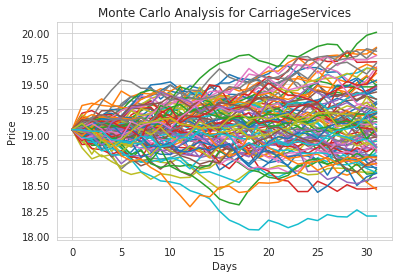

In [22]:
# Set up our time horizon
days = 32

# Now our delta
dt = 1/days

# mu (drift) from the expected return data 
mu = df1.mean()

# the volatility of the stock from the std() of the average return
sigma = df1.std()
start_price = 19.049999 #as seen in above dataframe

for run in range(100):
    plt.plot(stock_monte_carlo_price(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for CarriageServices')

In [0]:
#For histogram technique
start_price = 19.049999
days = 32
dt = 1/days
mu = df1.mean()
sigma = df1.std()

runs = 10000 #large numebr of runs
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo_price(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Carrier Services stock after 32 days')

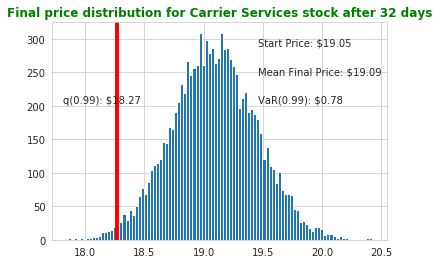

In [26]:
#using quantile to define our risk for this stock.

#define q as the 1% empirical quantile
q = np.percentile(simulations,1)

#plotting the distribution of the end prices
plt.hist(simulations, bins=100)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plotting a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

plt.title(label="Final price distribution for Carrier Services stock after %s days" % days, weight='bold', color='G')

So, this is 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Carrier Services from Yahoo finance, which looks to be 0.78 for every investment of 19.05 (The price of one initial CSV Stock in the year 2019).

This basically means for every initial CSV stock you purchase you're putting about $0.78 at risk 99% of the time from our Monte Carlo Simulation.

You can this method, to compare different stock prices and then to choose which one to buy.